# Macroeconomic Observations During a Pandemic

In [1]:
%pylab inline
from PIL import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## The Current Economic Cycle

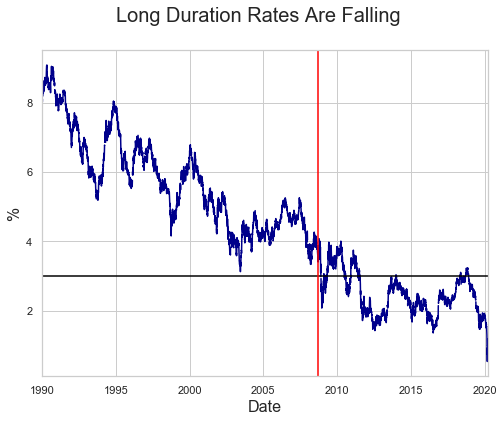

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Are Falling', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

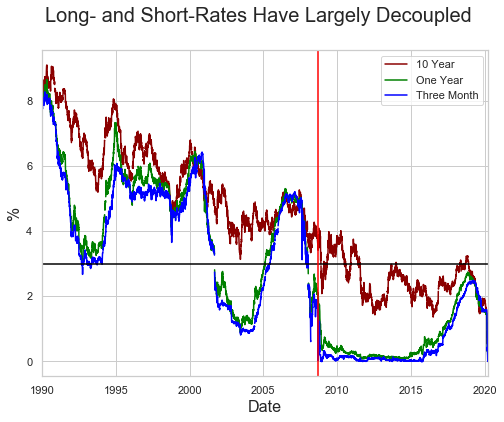

In [3]:
ten_year.plot(c='darkred', label='10 Year', figsize=(8, 6), )
one_year.plot(c='green', label='One Year')
three_month.plot(color='blue', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

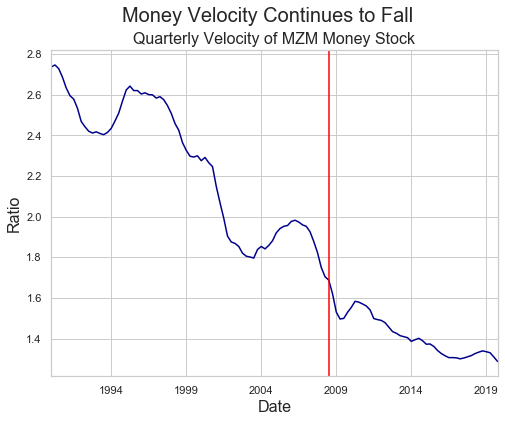

In [4]:
velocity = fred.get_series("MZMV", observation_start='1990-01-01')

velocity.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Money Velocity Continues to Fall', fontsize=20)
plt.title('Quarterly Velocity of MZM Money Stock', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ratio', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

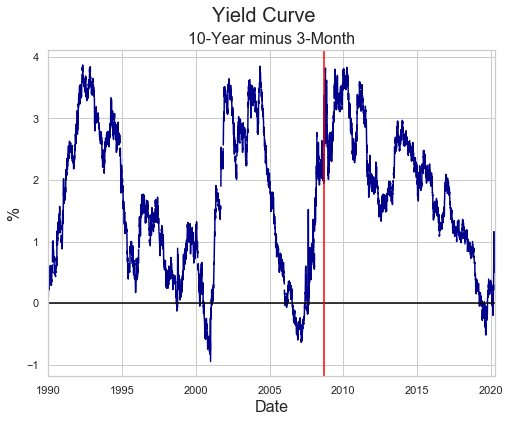

In [5]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')

yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve', fontsize=20)
plt.title('10-Year minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

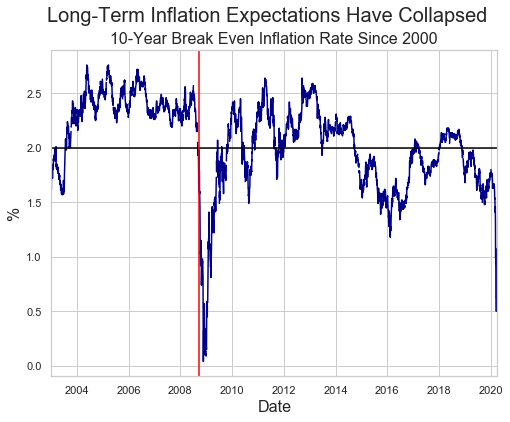

In [6]:
break_even = fred.get_series("T10YIE", observation_start='2000-01-01')

break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long-Term Inflation Expectations Have Collapsed', fontsize=20)
plt.title('10-Year Break Even Inflation Rate Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

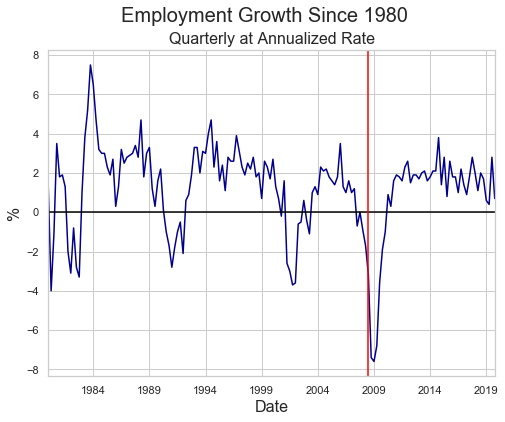

In [7]:
emp_growth = fred.get_series("PRS85006012", observation_start='1980-01-01')

emp_growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Employment Growth Since 1980', fontsize=20)
plt.title('Quarterly at Annualized Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

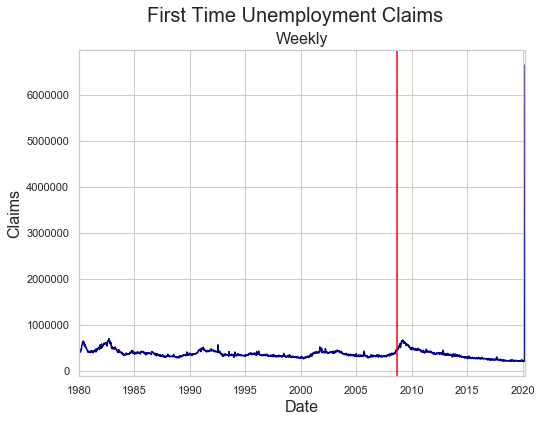

In [8]:
claims = fred.get_series("ICSA", observation_start='1980-01-01')

claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('First Time Unemployment Claims', fontsize=20)
plt.title('Weekly', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

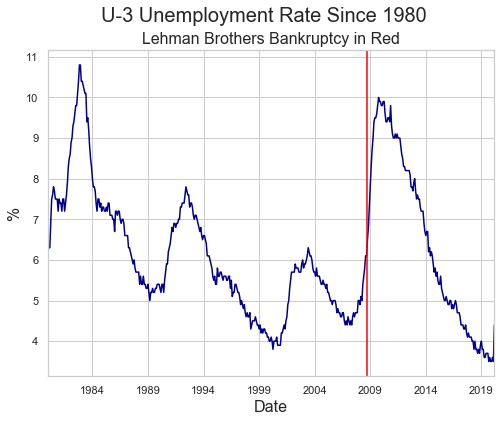

In [9]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')

unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('U-3 Unemployment Rate Since 1980', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

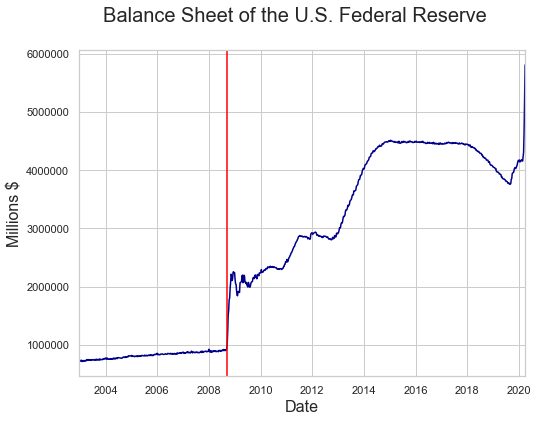

In [10]:
balance_sheet = fred.get_series("WALCL", observation_start='2000-01-01')

balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Balance Sheet of the U.S. Federal Reserve', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions $', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

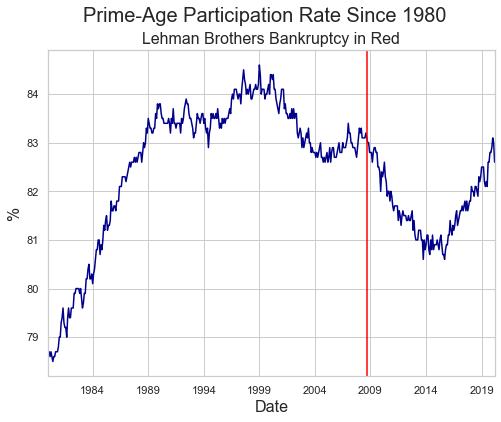

In [11]:
prime_part = fred.get_series("LNS11300060", observation_start='1980-01-01')

prime_part.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Prime-Age Participation Rate Since 1980', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

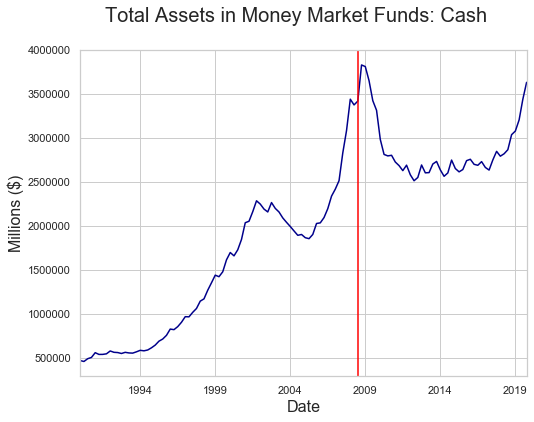

In [12]:
cash = fred.get_series("MMMFFAQ027S", observation_start='1990-01-01')

cash.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Total Assets in Money Market Funds: Cash', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

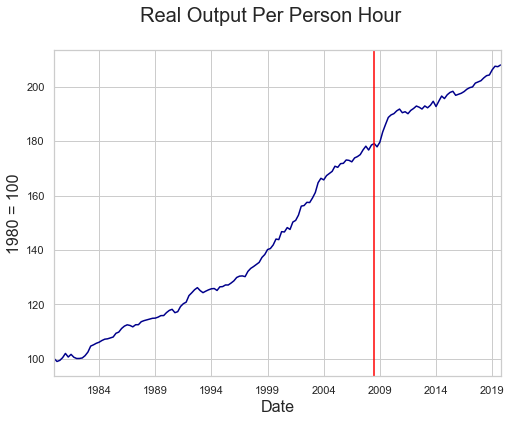

In [13]:
productivity = fred.get_series("OPHNFB", observation_start='1980-01-01') / 52 * 100

productivity.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Real Output Per Person Hour', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('1980 = 100', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

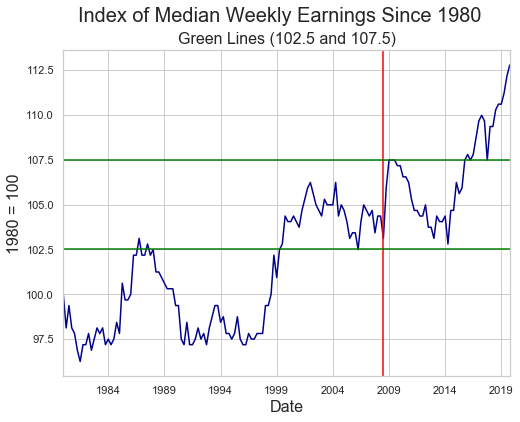

In [14]:
real_wage = fred.get_series("LES1252881600Q", observation_start='1980-01-01') / 321 * 100

real_wage.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Index of Median Weekly Earnings Since 1980', fontsize=20)
plt.title('Green Lines (102.5 and 107.5)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('1980 = 100', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(107.5, color="green")
plt.axhline(102.5, color="green")

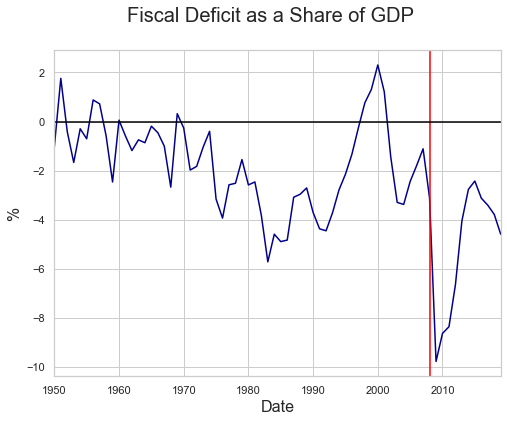

In [15]:
def_as_share = fred.get_series("FYFSGDA188S", observation_start='1950-01-01')

def_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fiscal Deficit as a Share of GDP', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0.0, color="black")

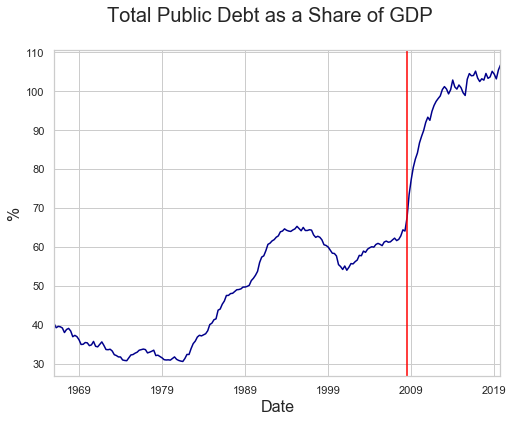

In [16]:
debt_as_share = fred.get_series("GFDEGDQ188S", observation_start='1950-01-01')

debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Total Public Debt as a Share of GDP', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

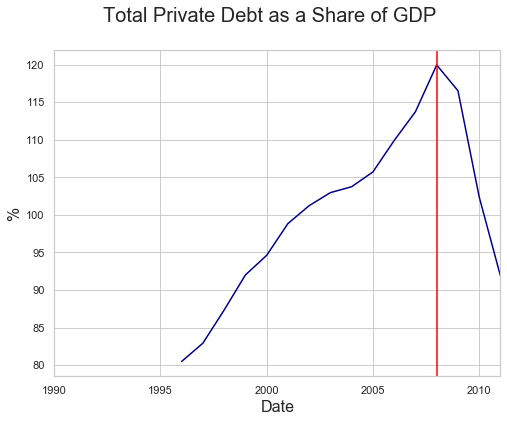

In [17]:
debt_as_share = fred.get_series("DDDM03USA156NWDB", observation_start='1950-01-01')

debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Total Private Debt as a Share of GDP', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

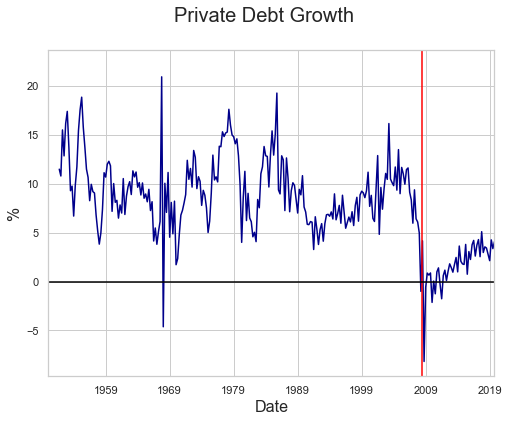

In [18]:
debt_as_share = fred.get_series("BOGZ1FG154104005Q", observation_start='1950-01-01')

debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Private Debt Growth', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0.0, color="black")

In [19]:
covid = pd.read_csv('https://covidtracking.com/api/us/daily.csv')
covid.describe

<bound method NDFrame.describe of         date  states  positive  negative  pending  hospitalizedCurrently  \
0   20200403      56    271915   1135356    61980                19926.0   
1   20200402      56    239009   1028649    62101                17157.0   
2   20200401      56    210770    939190    59669                16223.0   
3   20200331      56    184683    864201    59518                14236.0   
4   20200330      56    160530    784324    65369                12147.0   
5   20200329      56    139061    692290    65545                 9922.0   
6   20200328      56    118234    617470    65709                 8725.0   
7   20200327      56     99413    527220    60091                 7532.0   
8   20200326      56     80735    438603    60251                 5441.0   
9   20200325      56     63928    357604    51235                   96.0   
10  20200324      56     51954    292778    14433                    NaN   
11  20200323      56     42152    237321    14571     

In [20]:
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d')

In [21]:
covid = covid.sort_values('date')

In [22]:
covid['rate'] = covid['positive'] / covid['posNeg'] * 100

Text(0, 0.5, '%')

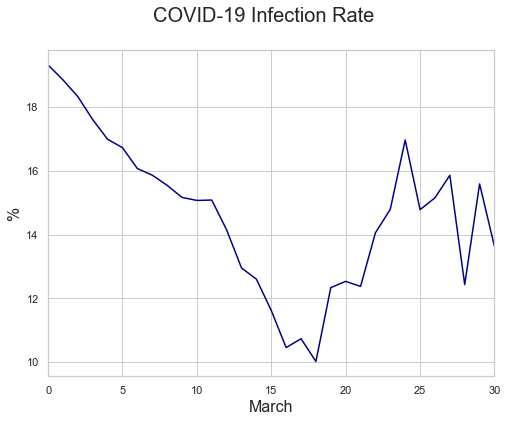

In [23]:
covid['rate'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('COVID-19 Infection Rate', fontsize=20)
plt.xlabel('March', fontsize=16)
plt.ylabel('%', fontsize=16)

### Graph is not particularly informative because there is not sufficient testing.